<a href="https://colab.research.google.com/github/xaugatp/Proto-type-1/blob/main/nlp303_saugat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP/GenAI Search System Proto-type**

**INTRODUCTION**
Traditional search methods often fall short when extracting relevant information from complex documents, leading to time-consuming and often inaccurate results. To tackle this, we aim to develop an AI-powered generative search system capable of answering questions directly from PDF documents with high precision. This solution will allow users to ask context-aware questions and receive accurate answers, improving efficiency and accessibility in various sectors like legal, financial, medical, and academic fields. Our system leverages the Retrieval-Augmented Generation (RAG) pipeline, integrating embedding, search, and generative layers for optimal response

**Retrieval-Augmented Generation (RAG)**
RAG enhances the performance of Large Language Models (LLMs) by referencing external knowledge bases, ensuring the generated responses are accurate and contextually relevant. LLMs are trained on vast datasets and use billions of parameters for tasks like Q&A, translation, and content generation. RAG makes this process more reliable and cost-effective by incorporating up-to-date information from trusted sources.

**Data Source**
- Document: ING_Health_Insurance_Policy_Booklet.pdf
- Format: PDF

**ARCHITECTURE**


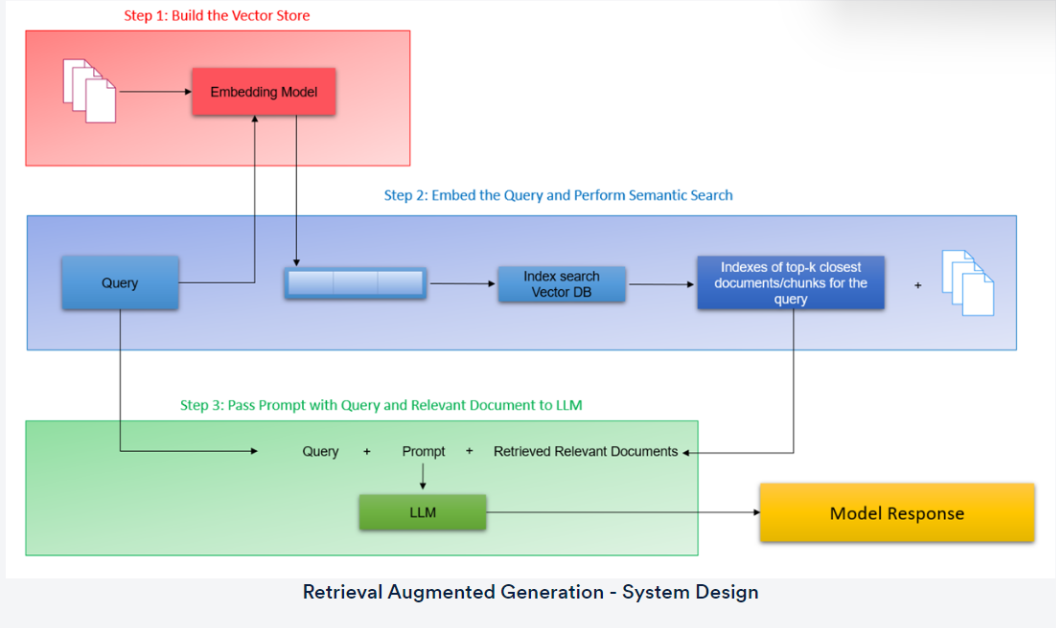

**Importing necessary libraries**

In [ ]:
# To install necessary Python packages for the project:
!pip install -U -q pdfplumber tiktoken openai chromaDB sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.7/268.7 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 24.4 MB/s eta

In [ ]:
# To import all the required libraries:

# Standard library imports
# To handle file system paths
from pathlib import Path
# To work with JSON data
import json

# Third-party imports
# To extract text and metadata from PDF documents:
import pdfplumber
# To manipulate and analyze data in DataFrames:
import pandas as pd
# To efficiently extract specific fields from objects:
from operator import itemgetter
 # To tokenize text using advanced encoding:
import tiktoken
# To create and manage Chroma vector databases:
import chromadb

In [ ]:
# To mount Google Drive for accessing files:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Read, Process, and Chunk the PDF Files**

In [ ]:
# To define the path of the PDF:
# Path of file location:
pdf_path = '/content/drive/MyDrive/NLP303_Saugat/ING_Health_Insurance_Policy_Booklet.pdf'

**To read and explore a single PDF file using pdfplumber**

In [ ]:
# To open the PDF file and extract text and tables:
# To open the PDF file using pdfplumber:
with pdfplumber.open(pdf_path) as pdf:

    # To get the page at index 8 (9th page) from the PDF:
    single_page = pdf.pages[8]

    # To extract text from the specified page:
    text = single_page.extract_text()

    # To extract tables from the specified page:
    tables = single_page.extract_tables()

    # To print the extracted text for review:
    print(text)

Policy Booklet
Waiting Periods when switching Funds or
changing Products
We recognise the Waiting Periods you have already served on your Previous
Cover as at the date of transfer. The following Waiting Period rules apply.
On the new Product:
4.
■ Waiting Periods will apply only to services with higher Benefits,
services not previously Covered or where a Member has not
fully served Waiting Periods on the Previous Cover (the balance
of the Waiting Period will apply with Us).
■ For services already Covered at an equivalent level, no Waiting
Period will apply.
■ Lower Benefits or reduced coverage on the new Product applies
immediately.
■ If the Hospital Excess on the new Cover is lower than the Previous
Cover, the previous Hospital Excess will apply for the duration of
the Standard Hospital Waiting Period that applies to a Benefit
(regardless whether a Member is required to serve a Waiting Period
in order to make a Claim for that Benefit).
■ If the Hospital Excess on the new Product is hi

In [ ]:
# To view the first table on the page, if any:
# To print the first table extracted from the page:
if tables:
    print(tables[0])
else:
    print("No tables found on this page.")

No tables found on this page.


In [ ]:
# To define the path of the PDF located:
# To update the path:
single_pdf_path = '/content/drive/MyDrive/NLP303_Saugat/ING_Health_Insurance_Policy_Booklet.pdf'

# To open the PDF file and process all pages:

import pdfplumber

# To open the PDF file using pdfplumber:
with pdfplumber.open(single_pdf_path) as pdf:

    # To loop through all pages in the PDF:
    for i, page in enumerate(pdf.pages):
        # To extract text from the current page:
        text = page.extract_text()

        # To extract tables from the current page:
        tables = page.extract_tables()

        # To print the text from the current page:
        print(f"Page {i + 1} Text:")
        print(text)

        # To check if there are tables and print them:
        if tables:
            print(f"Page {i + 1} Tables:")
            for table in tables:
                print(table)
        else:
            print("No tables found on this page.")


Page 1 Text:
Policy
booklet
Important information about
ING Health Insurance
■ General terms and conditions
■ Hospital cover
■ Extras cover
■ Ambulance cover
■ Government initiatives
Read with your product
information.
Effective 1 October 2024.
No tables found on this page.
Page 2 Text:

No tables found on this page.
Page 3 Text:
Policy Booklet
About the insurer
ING Health Insurance is issued by nib health funds limited
(ABN 83 000 124 381) (nib), a registered private health insurer.
About the agent
nib has appointed ING Bank (Australia) Limited (ABN 24 000 893 292) (ING)
as its authorised agent to promote and distribute this health insurance on
behalf of nib. An ING Health Insurance policy issued does not represent a
deposit with or liability of, and is not guaranteed or otherwise supported by,
ING or its related bodies corporate. ING is paid a commission by nib for
promoting and arranging this insurance.
About this document
This document is issued by nib as the underwriter of this he

**To Extract text from PDF:**

In [ ]:
# Function to check whether a word is present in a table or not for segregation of regular text and tables:
def check_bboxes(word, table_bbox):
    # To check whether word is inside a table bbox:
    l = word['x0'], word['top'], word['x1'], word['bottom']
    r = table_bbox
    return l[0] > r[0] and l[1] > r[1] and l[2] < r[2] and l[3] < r[3]

In [ ]:
def extract_text_from_pdf(pdf_path):

    # Extracts text and tables from a PDF file and organizes them by page.


    # To initialize page counter and list to store extracted text:
    p = 0
    full_text = []

    # To open the PDF file using pdfplumber:
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            # To store the page number:
            page_no = f"Page {p + 1}"

            # To extract text from the page:
            text = page.extract_text()

            # To find tables and their bounding boxes in the page:
            tables = page.find_tables()
            table_bboxes = [i.bbox for i in tables]
            tables = [{'table': i.extract(), 'top': i.bbox[1]} for i in tables]

            # To extract words not inside tables:
            non_table_words = [word for word in page.extract_words() if not any(
                [check_bboxes(word, table_bbox) for table_bbox in table_bboxes])]

            # To initialize list to store lines of text:
            lines = []

            # To cluster non-table words and table data by their vertical position:
            for cluster in pdfplumber.utils.cluster_objects(non_table_words + tables, itemgetter('top'), tolerance=5):

                # To append text elements to lines:
                if 'text' in cluster[0]:
                    try:
                        lines.append(' '.join([i['text'] for i in cluster]))
                    except KeyError:
                        pass

                # To append table elements to lines in JSON format:
                elif 'table' in cluster[0]:
                    lines.append(json.dumps(cluster[0]['table']))

            # To append the page number and the combined text to full_text:
            full_text.append([page_no, " ".join(lines)])
            p += 1

    return full_text


In [ ]:
# To specify the file path to the PDF as a string:
pdf_path = '/content/drive/MyDrive/NLP303_Saugat/ING_Health_Insurance_Policy_Booklet.pdf'
# To begin processing the PDF file:
print(f"...Processing {pdf_path}")

# To call the function to extract text from the PDF:
extracted_text = extract_text_from_pdf(pdf_path)

# To convert the extracted list to a DataFrame and add a column to store the document name:
extracted_text_df = pd.DataFrame(extracted_text, columns=['Page No.', 'Page_Text'])
extracted_text_df['Document Name'] = pdf_path

# To display a message indicating the progress:
print(f"Finished processing {pdf_path}")

# To confirm that the PDF has been successfully processed:
print("PDF has been processed.")

...Processing /content/drive/MyDrive/NLP303_Saugat/ING_Health_Insurance_Policy_Booklet.pdf
Finished processing /content/drive/MyDrive/NLP303_Saugat/ING_Health_Insurance_Policy_Booklet.pdf
PDF has been processed.


In [ ]:
# To verify the correctness of the extracted text by inspecting a specific page:
pdf = extracted_text_df.iloc[4]['Page_Text']
pdf

'Policy Booklet Section 3 – General terms of Extras Cover 29 Our Recognised Providers ................................................................................29 First Choice Providers ........................................................................................29 What is Covered .................................................................................................30 What is not Covered ..........................................................................................34 Section 4 – General terms of Benefits for ambulance 35 Our Recognised Providers ................................................................................35 What is Covered .................................................................................................35 What is not Covered ..........................................................................................35 Section 5 – Our obligations 36 Section 6 – Your obligations 37 Section 7 – Health insurance init

In [ ]:
# To print the DataFrame to see the extracted data:
print(extracted_text_df)

   Page No.                                          Page_Text  \
0    Page 1  Policy booklet Important information about ING...   
1    Page 2                                                      
2    Page 3  Policy Booklet About the insurer ING Health In...   
3    Page 4  Contents Section 1 – General terms of Cover 4 ...   
4    Page 5  Policy Booklet Section 3 – General terms of Ex...   
5    Page 6  General terms 01 of Cover SECTION Section 1 – ...   
6    Page 7  Policy Booklet Adding a dependant or Partner A...   
7    Page 8  Standard Ambulance Waiting Periods Approved am...   
8    Page 9  Policy Booklet Waiting Periods when switching ...   
9   Page 10  Pre-Existing Conditions and Hospital Benefits ...   
10  Page 11  Policy Booklet Who can view and change the Pol...   
11  Page 12  ■ No Benefits will be paid by Us during a peri...   
12  Page 13  Policy Booklet Your Premiums Premiums must be ...   
13  Page 14  ■ if there are insufficient funds to make paym...   
14  Page 1

In [ ]:
pdfs_data = extracted_text_df

In [ ]:

pdfs_data

,Page No.,Page_Text,Document Name
0,Page 1,Policy booklet Important information about ING...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...
1,Page 2,,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...
2,Page 3,Policy Booklet About the insurer ING Health In...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...
3,Page 4,Contents Section 1 – General terms of Cover 4 ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...
4,Page 5,Policy Booklet Section 3 – General terms of Ex...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...
5,Page 6,General terms 01 of Cover SECTION Section 1 – ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...
6,Page 7,Policy Booklet Adding a dependant or Partner A...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...
7,Page 8,Standard Ambulance Waiting Periods Approved am...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...
8,Page 9,Policy Booklet Waiting Periods when switching ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...
9,Page 10,Pre-Existing Conditions and Hospital Benefits ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...


In [ ]:

# To check the length of all the texts as there might be some empty pages or pages with very few words that we can drop:
pdfs_data['Text_Length'] = pdfs_data['Page_Text'].apply(lambda x: len(x.split(' ')))

In [ ]:
pdfs_data['Text_Length']

,Text_Length
0,34
1,1
2,232
3,142
4,118
5,434
6,413
7,183
8,490
9,462


In [ ]:
# To retain only the rows where the text length is at least 10 words:
# This helps filter out pages with very little content:
pdfs_data = pdfs_data.loc[
    pdfs_data['Text_Length'] >= 10
]

# To display the filtered data:
pdfs_data

,Page No.,Page_Text,Document Name,Text_Length
0,Page 1,Policy booklet Important information about ING...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,34
2,Page 3,Policy Booklet About the insurer ING Health In...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,232
3,Page 4,Contents Section 1 – General terms of Cover 4 ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,142
4,Page 5,Policy Booklet Section 3 – General terms of Ex...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,118
5,Page 6,General terms 01 of Cover SECTION Section 1 – ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,434
6,Page 7,Policy Booklet Adding a dependant or Partner A...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,413
7,Page 8,Standard Ambulance Waiting Periods Approved am...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,183
8,Page 9,Policy Booklet Waiting Periods when switching ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,490
9,Page 10,Pre-Existing Conditions and Hospital Benefits ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,462
10,Page 11,Policy Booklet Who can view and change the Pol...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,464


In [ ]:

# To create a new column 'Metadata' to store metadata for each page:
# Metadata includes 'Policy_Name' (derived from 'Document Name') and 'Page_No.' from 'Page No.':

pdfs_data['Metadata'] = pdfs_data.apply(
    lambda x: {
        'Policy_Name': x['Document Name'][:-4],  # To extract policy name by removing the file extension
        'Page_No.': x['Page No.']  # Include the page number
    },
    axis=1  # To apply the function row-wise
)



<ipython-input-18-737324dee33d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdfs_data['Metadata'] = pdfs_data.apply(


In [ ]:
pdfs_data

,Page No.,Page_Text,Document Name,Text_Length,Metadata
0,Page 1,Policy booklet Important information about ING...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,34,{'Policy_Name': '/content/drive/MyDrive/NLP303...
2,Page 3,Policy Booklet About the insurer ING Health In...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,232,{'Policy_Name': '/content/drive/MyDrive/NLP303...
3,Page 4,Contents Section 1 – General terms of Cover 4 ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,142,{'Policy_Name': '/content/drive/MyDrive/NLP303...
4,Page 5,Policy Booklet Section 3 – General terms of Ex...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,118,{'Policy_Name': '/content/drive/MyDrive/NLP303...
5,Page 6,General terms 01 of Cover SECTION Section 1 – ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,434,{'Policy_Name': '/content/drive/MyDrive/NLP303...
6,Page 7,Policy Booklet Adding a dependant or Partner A...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,413,{'Policy_Name': '/content/drive/MyDrive/NLP303...
7,Page 8,Standard Ambulance Waiting Periods Approved am...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,183,{'Policy_Name': '/content/drive/MyDrive/NLP303...
8,Page 9,Policy Booklet Waiting Periods when switching ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,490,{'Policy_Name': '/content/drive/MyDrive/NLP303...
9,Page 10,Pre-Existing Conditions and Hospital Benefits ...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,462,{'Policy_Name': '/content/drive/MyDrive/NLP303...
10,Page 11,Policy Booklet Who can view and change the Pol...,/content/drive/MyDrive/NLP303_Saugat/ING_Healt...,464,{'Policy_Name': '/content/drive/MyDrive/NLP303...


In [ ]:
# To set the API key:
filepath = "/content/drive/MyDrive/NLP303_Saugat/"
with open(filepath + "API_Key.txt.txt", "r") as f:
    hf_api_key = ' '.join(f.readlines()).strip()

In [ ]:
# To import necessary libraries:
from transformers import AutoTokenizer, AutoModel
import numpy as np
import chromadb

In [ ]:
# To define the path where chroma collections will be stored:
chroma_data_path = '/content/drive/MyDrive/NLP303_Saugat/ChromaDB_Data'

In [ ]:
# To initialize the PersistentClient for Chroma:
client = chromadb.PersistentClient()

In [ ]:
# To set up the tokenizer and model from Hugging Face:
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

In [ ]:

# Custom embedding function:
def compute_embeddings(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

In [ ]:
# To initialize or get the collection in Chroma:
pdf_collection = client.get_or_create_collection(name='RAG_on_pdf')

In [ ]:

# To convert the page text and metadata from your dataframe to lists:
documents_list = pdfs_data["Page_Text"].tolist()
metadata_list = pdfs_data['Metadata'].tolist()

In [ ]:
# To compute embeddings for documents:
embeddings = compute_embeddings(documents_list)

In [ ]:
# To add the documents, embeddings, and metadata to the collection:
pdf_collection.add(
    documents=documents_list,
    embeddings=embeddings,
    ids=[str(i) for i in range(len(documents_list))],
    metadatas=metadata_list
)

# To view the first few entries in the collection:
print(pdf_collection.get(
    ids=['0', '1', '2'],
    include=['embeddings', 'documents', 'metadatas']
))

{'ids': ['0', '1', '2'], 'embeddings': array([[ 0.14297932,  0.09044848,  0.36361665, ..., -0.19478571,
         0.03312866,  0.24451011],
       [ 0.05485328,  0.03429606,  0.11844987, ..., -0.15552962,
         0.07402009,  0.08824638],
       [-0.05947021,  0.05309708, -0.01190408, ..., -0.04099376,
         0.17178798,  0.09469014]]), 'documents': ['Policy booklet Important information about ING Health Insurance ■ General terms and conditions ■ Hospital cover ■ Extras cover ■ Ambulance cover ■ Government initiatives Read with your product information. Effective 1 October 2024.', 'Policy Booklet About the insurer ING Health Insurance is issued by nib health funds limited (ABN 83 000 124 381) (nib), a registered private health insurer. About the agent nib has appointed ING Bank (Australia) Limited (ABN 24 000 893 292) (ING) as its authorised agent to promote and distribute this health insurance on behalf of nib. An ING Health Insurance policy issued does not represent a deposit with 

In [ ]:
# To initialize or get the cache collection in Chroma:
cache_collection = client.get_or_create_collection(name='pdf_Cache')

In [ ]:
# Peek at the cache collection:
print(cache_collection.peek())

{'ids': [], 'embeddings': array([], dtype=float64), 'documents': [], 'uris': None, 'data': None, 'metadatas': [], 'included': [<IncludeEnum.embeddings: 'embeddings'>, <IncludeEnum.documents: 'documents'>, <IncludeEnum.metadatas: 'metadatas'>]}


**Semantic Search with Cache:**

In [ ]:
# To read the user query:
query = input("Enter your query: ")

Enter your query: What is covered?


In [ ]:
# To search the Cache collection first:
cache_results = cache_collection.query(
    query_texts=[query],
    n_results=1
)

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:07<00:00, 11.2MiB/s]


In [ ]:
cache_results

{'ids': [[]],
 'embeddings': None,
 'documents': [[]],
 'uris': None,
 'data': None,
 'metadatas': [[]],
 'distances': [[]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [ ]:
results = pdf_collection.query(
query_texts=query,
n_results=10
)

In [ ]:
import pandas as pd
# To set a threshold for cache search:
threshold = 0.2

# To initialize lists for storing results:
ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()

# To check if the query is found in the cache:
if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
    # Query the main collection if not found or distance is above the threshold:
    results = pdf_collection.query(
        query_texts=[query],
        n_results=10
    )

    # To store the query in the cache collection for future use:
    keys = []
    values = []

    for key, val in results.items():
        if val is None:
            continue
        for i in range(len(val[0])):
            keys.append(f"{key}_{i}")
            values.append(str(val[0][i]))

    cache_collection.add(
        documents=[query],
        ids=[query],  # To assign the query text as ID for cache storage
        metadatas=dict(zip(keys, values))
    )

    print("Not found in cache. Found in main collection.")

    # To prepare DataFrame with results from the main collection:
    result_dict = {
        'IDs': results['ids'][0],
        'Documents': results['documents'][0],
        'Distances': results['distances'][0],
        'Metadatas': results['metadatas'][0]
    }
    results_df = pd.DataFrame.from_dict(result_dict)

else:
    # To process results from the cache:
    cache_result_dict = cache_results['metadatas'][0][0]

    # To extract cache results:
    for key, value in cache_result_dict.items():
        if 'ids' in key:
            ids.append(value)
        elif 'documents' in key:
            documents.append(value)
        elif 'distances' in key:
            distances.append(value)
        elif 'metadatas' in key:
            metadatas.append(value)

    print("Found in cache!")

    # To create a DataFrame with cache results:
    results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
    })

Not found in cache. Found in main collection.


In [ ]:
results_df

,IDs,Documents,Distances,Metadatas
0,42,“Claimable Hospital Expenses” means expenses i...,1.835096,"{'Page_No.': 'Page 44', 'Policy_Name': '/conte..."
1,47,Policy Booklet “Nursing Home Type Benefit” mea...,1.904053,"{'Page_No.': 'Page 49', 'Policy_Name': '/conte..."
2,48,“Pharmaceutical Benefit” means General Treatme...,2.122658,"{'Page_No.': 'Page 50', 'Policy_Name': '/conte..."
3,46,“Included Services” means Hospital Treatment o...,2.167850,"{'Page_No.': 'Page 48', 'Policy_Name': '/conte..."
4,44,“Excess Premiums” means any Premiums paid beyo...,2.239919,"{'Page_No.': 'Page 46', 'Policy_Name': '/conte..."
5,24,■ Not every health Cover has Restricted Servic...,2.271816,"{'Page_No.': 'Page 26', 'Policy_Name': '/conte..."
6,41,Glossary of 08 important terms SECTION Section...,2.293510,"{'Page_No.': 'Page 43', 'Policy_Name': '/conte..."
7,23,"Policy Booklet ■ Where the price is greater, t...",2.298924,"{'Page_No.': 'Page 25', 'Policy_Name': '/conte..."
8,49,Policy Booklet “Premium” or “Contribution” mea...,2.416627,"{'Page_No.': 'Page 51', 'Policy_Name': '/conte..."
9,32,iv. the membership is not provided as part of ...,2.442625,"{'Page_No.': 'Page 34', 'Policy_Name': '/conte..."


**Re-Ranking with a Cross Encoder**

In [ ]:
# To import the CrossEncoder library from sentence_transformers:

from sentence_transformers import CrossEncoder, util

In [ ]:

# To initialise the cross encoder model:

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# To test the cross encoder model:
# Sample queries and responses to test the cross-encoder model
test_samples = [
    ['Who is eligible to remain on their parents’ health insurance policy as a Non-Student Dependant?', 'Dependants aged between 21 and up to 31 years, who are no longer studying, can remain on their parents’ cover as a Non-Student Dependant for an additional fee, subject to conditions and product limitations.'],
    ['What are the conditions for a dependant to be covered under the health insurance policy?', 'Dependants, including Child Dependants, Non-Classified Dependants, Student Dependants, and Non-Student Dependants, must be unmarried and not in a defacto relationship.'],
    ['What requirements must be met for all individuals on the policy to claim hospital or medical treatment?', 'All listed individuals must be Australian Citizens, Permanent Residents, or entitled to full reciprocal rights under Medicare, registered for Medicare, and listed on an active Medicare card.'],
    ['What is the process for adding a newborn to the health insurance policy?', 'Immediate cover is provided if notified within 2 months after the birth and the parent upgrades from a Single or Couples Policy. Alternatively, the newborn can be added within 24 months if added to an active Family or Single Parent Family Policy.'],
    ['Are there any exceptions to waiting periods for newly insured members?', 'Veteran Gold Card holders are exempt from waiting periods when they join within 2 months of ceasing entitlements to the Veteran Gold Card for hospital or general treatment.']
]

 # Predicting scores with the cross-encoder model
scores = cross_encoder.predict(test_samples)

In [ ]:
 scores

array([ 7.1870594 , -2.8712678 , -3.5074654 ,  3.5527813 ,  0.06667595],
      dtype=float32)

In [ ]:
# To input (query, response) pairs for each of the top 20 responses received from the semantic search to the cross encoder:
# To generate the cross_encoder scores for these pairs:

cross_inputs = [[query, response] for response in results_df['Documents']]
cross_rerank_scores = cross_encoder.predict(cross_inputs)

In [ ]:

cross_rerank_scores

array([-3.362574 , -6.38612  , -6.2406487, -4.5446563, -5.824366 ,
       -4.8179283, -4.052148 , -3.691483 , -3.885159 , -4.8256364],
      dtype=float32)

In [ ]:
# To store the rerank_scores in results_df:

results_df['Reranked_scores'] = cross_rerank_scores

In [ ]:
results_df

,IDs,Documents,Distances,Metadatas,Reranked_scores
0,42,“Claimable Hospital Expenses” means expenses i...,1.835096,"{'Page_No.': 'Page 44', 'Policy_Name': '/conte...",-3.362574
1,47,Policy Booklet “Nursing Home Type Benefit” mea...,1.904053,"{'Page_No.': 'Page 49', 'Policy_Name': '/conte...",-6.386120
2,48,“Pharmaceutical Benefit” means General Treatme...,2.122658,"{'Page_No.': 'Page 50', 'Policy_Name': '/conte...",-6.240649
3,46,“Included Services” means Hospital Treatment o...,2.167850,"{'Page_No.': 'Page 48', 'Policy_Name': '/conte...",-4.544656
4,44,“Excess Premiums” means any Premiums paid beyo...,2.239919,"{'Page_No.': 'Page 46', 'Policy_Name': '/conte...",-5.824366
5,24,■ Not every health Cover has Restricted Servic...,2.271816,"{'Page_No.': 'Page 26', 'Policy_Name': '/conte...",-4.817928
6,41,Glossary of 08 important terms SECTION Section...,2.293510,"{'Page_No.': 'Page 43', 'Policy_Name': '/conte...",-4.052148
7,23,"Policy Booklet ■ Where the price is greater, t...",2.298924,"{'Page_No.': 'Page 25', 'Policy_Name': '/conte...",-3.691483
8,49,Policy Booklet “Premium” or “Contribution” mea...,2.416627,"{'Page_No.': 'Page 51', 'Policy_Name': '/conte...",-3.885159
9,32,iv. the membership is not provided as part of ...,2.442625,"{'Page_No.': 'Page 34', 'Policy_Name': '/conte...",-4.825636


In [ ]:

# To return the top 3 results from semantic search:

top_3_semantic = results_df.sort_values(by='Distances')
top_3_semantic[:3]

,IDs,Documents,Distances,Metadatas,Reranked_scores
0,42,“Claimable Hospital Expenses” means expenses i...,1.835096,"{'Page_No.': 'Page 44', 'Policy_Name': '/conte...",-3.362574
1,47,Policy Booklet “Nursing Home Type Benefit” mea...,1.904053,"{'Page_No.': 'Page 49', 'Policy_Name': '/conte...",-6.386120
2,48,“Pharmaceutical Benefit” means General Treatme...,2.122658,"{'Page_No.': 'Page 50', 'Policy_Name': '/conte...",-6.240649


In [ ]:

# To return the top 3 results after reranking:
top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank[:3]


,IDs,Documents,Distances,Metadatas,Reranked_scores
0,42,“Claimable Hospital Expenses” means expenses i...,1.835096,"{'Page_No.': 'Page 44', 'Policy_Name': '/conte...",-3.362574
7,23,"Policy Booklet ■ Where the price is greater, t...",2.298924,"{'Page_No.': 'Page 25', 'Policy_Name': '/conte...",-3.691483
8,49,Policy Booklet “Premium” or “Contribution” mea...,2.416627,"{'Page_No.': 'Page 51', 'Policy_Name': '/conte...",-3.885159


In [ ]:
top_3_RAG = top_3_rerank[["Documents", "Metadatas"]][:3]

In [ ]:
top_3_RAG

,Documents,Metadatas
0,“Claimable Hospital Expenses” means expenses i...,"{'Page_No.': 'Page 44', 'Policy_Name': '/conte..."
7,"Policy Booklet ■ Where the price is greater, t...","{'Page_No.': 'Page 25', 'Policy_Name': '/conte..."
8,Policy Booklet “Premium” or “Contribution” mea...,"{'Page_No.': 'Page 51', 'Policy_Name': '/conte..."


**Retrieval Augmented Generation**

In [ ]:
from transformers import pipeline

# To initialize the model for text generation or question answering:
generator = pipeline('text-generation', model='gpt2')

def generate_response(query, top_n=3):
    # To generate responses:
    responses = generator(query, max_length=50, num_return_sequences=top_n)

    # To return top responses:
    return [response['generated_text'] for response in responses]

query = query
top_3_RAG = generate_response(query, top_n=3)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [ ]:
# To print the response:
print("\n".join(top_3_RAG))

What is covered? You have access to your own storage account and you do not need additional credit for other uses of your account. Do not be embarrassed, it is not a gift to anyone but to you. You use the card to buy food,
What is covered?

The most common uses for e-learning are:

To improve user experience for learning, help users find a product

to improve user experience for learning, help users find a product to enhance their knowledge of a
What is covered? Well....yeah. They went into the lab and we went to the lab and they got some of the results of the blood tests which is how you get a whole lot of the information out of that. We had some blood out
